In [39]:
# Dependencies and Setup
%matplotlib inline
%matplotlib notebook

In [5]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinical_combine = pd.merge(clinical_trial_data, mouse_drug_data,how='outer', on="Mouse ID")

# Display the data table for preview
mouse_clinical_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_group_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"])
#combine_group_mean.reset_index( level = None,inplace = True)
# Convert to DataFrame
df_tumor_response_mean = pd.DataFrame(combine_group_mean["Tumor Volume (mm3)"].mean())
df_tumor_response_mean.reset_index( level = None,inplace = True)
#tumor_response_mean_df = pd.DataFrame(combine_group_mean)
# Preview DataFrame
df_tumor_response_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_group_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"])
#combine_group_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame

df_tumor_response_sem_tumorvol = pd.DataFrame(combine_group_sem["Tumor Volume (mm3)"].sem())
df_tumor_response_sem_tumorvol.reset_index(level = None, inplace = True)
# Preview DataFrame
df_tumor_response_sem_tumorvol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)


pymaceuticals_pivot_table = df_tumor_response_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pymaceuticals_pivot_table.reset_index(level = None, inplace = True)
# Preview that Reformatting worked


pymaceuticals_pivot_table.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [9]:
#pivot table for 4 required drugs

pivot_table_fourdrugs = pymaceuticals_pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
pivot_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


<IPython.core.display.Javascript object>


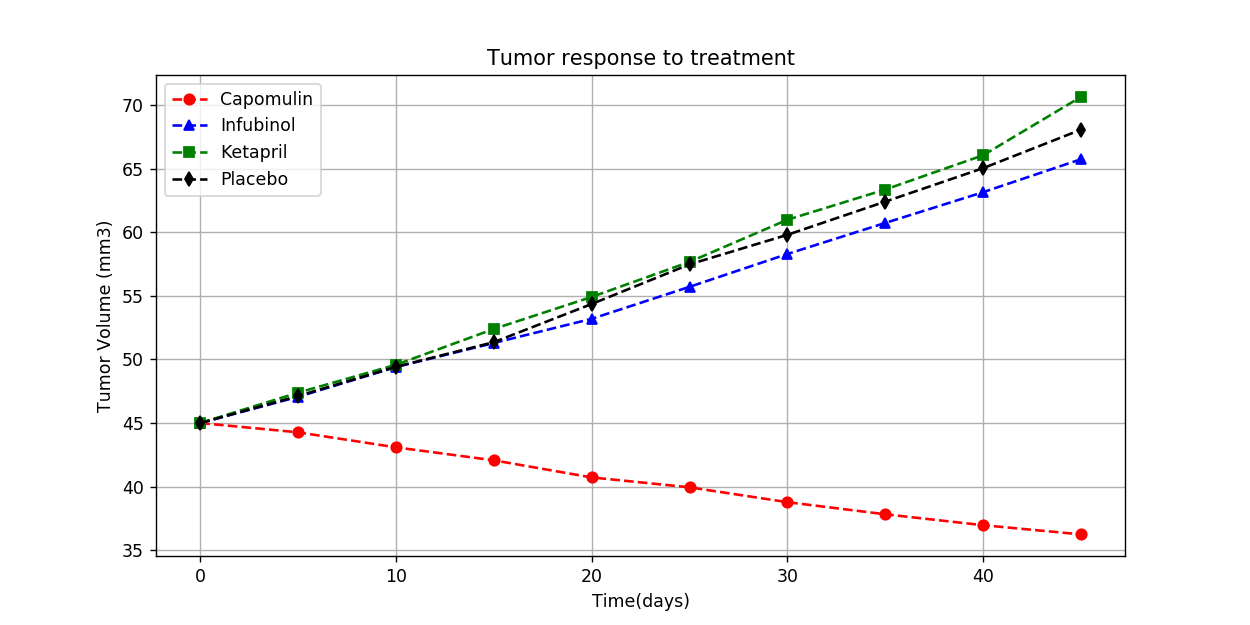

In [12]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots(figsize = (10, 5))

ax.errorbar(x=pivot_table_fourdrugs['Timepoint'],y=pivot_table_fourdrugs['Capomulin'], yerr=None, color = "red", linestyle="--", fmt='o')

ax.errorbar(x=pivot_table_fourdrugs['Timepoint'],y=pivot_table_fourdrugs['Infubinol'], yerr=None, color = "blue", linestyle="--", fmt='^')
ax.errorbar(x=pivot_table_fourdrugs['Timepoint'],y=pivot_table_fourdrugs['Ketapril'], yerr=None, color = "green", linestyle="--",fmt='s')
ax.errorbar(x=pivot_table_fourdrugs['Timepoint'],y=pivot_table_fourdrugs['Placebo'], yerr=None, color = "black", linestyle="--", fmt='d')




ax.grid()
ax.legend()
ax.set_xlabel("Time(days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor response to treatment")


# Save the Figure
fig.savefig("IMAGES_OF_PLOTS/tumorrResponseToTreatment.png")


#import os
#path = os.path.join(os.path.expanduser("~"), "Desktop", "tumorrResponseToTreatment.png")
#fig.savefig(path)



In [14]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_mean_met= mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()



# Convert to DataFrame
df_met_response_mean = pd.DataFrame(group_mean_met["Metastatic Sites"])
df_met_response_mean.reset_index(level = None, inplace = True)

# Preview DataFrame
df_met_response_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

group_met_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()


# Convert to DataFrame
df_met_response_sem = pd.DataFrame(group_met_sem["Metastatic Sites"])
df_met_response_sem.reset_index(level = None, inplace = True)

# Preview DataFrame
df_met_response_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
# Minor Data Munging to Re-Format the Data Frames
#df_met_response_mean

pivot_table_met = df_met_response_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)


# Preview that Reformatting worked
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [18]:
met_table_fourdrugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


<IPython.core.display.Javascript object>


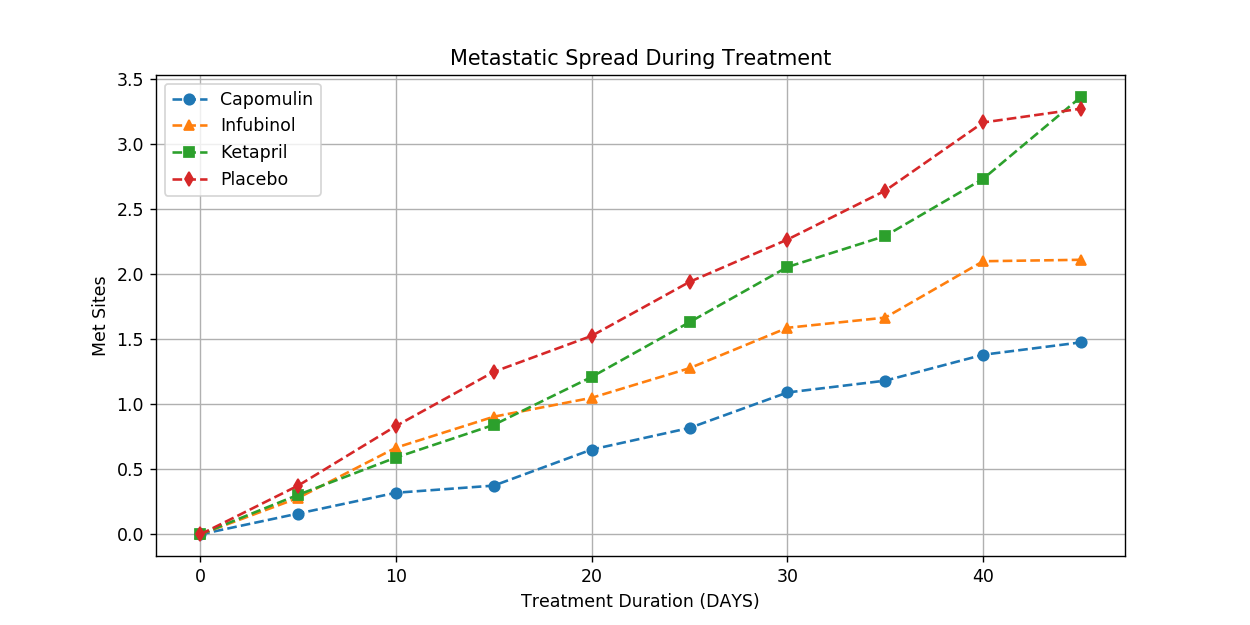

In [19]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots(figsize = (10, 5))


ax.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
ax.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='^')
ax.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='s')
ax.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='d')


ax.set_ylabel("Met Sites")
ax.set_xlabel("Treatment Duration (DAYS)")
ax.set_title('Metastatic Spread During Treatment')
ax.grid()
ax.legend()       

# Save the Figure
# Save the Figure
fig.savefig("IMAGES_OF_PLOTS/MetastaticSpreadDuringTreatment.png")

#import os
#path = os.path.join(os.path.expanduser("~"), "Desktop", "MetastaticSpreadDuringTreatment.png")
#fig.savefig()

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=mouse_clinical_combine.groupby(["Drug","Timepoint"]).count()
# Convert to DataFrame
df_micecount=pd.DataFrame(mice_count["Mouse ID"])
df_micecount.reset_index(inplace=True)
# Preview DataFrame
df_micecount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames

pivot_table_mice_count = df_micecount.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")


pivot_table_mice_count.reset_index(level = None, inplace = True)

# Preview the Data Frame
pivot_table_mice_count.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [22]:
# dataframe for the required 4 drugs to plot
mice_table_fourdrugs = pivot_table_mice_count[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


<IPython.core.display.Javascript object>


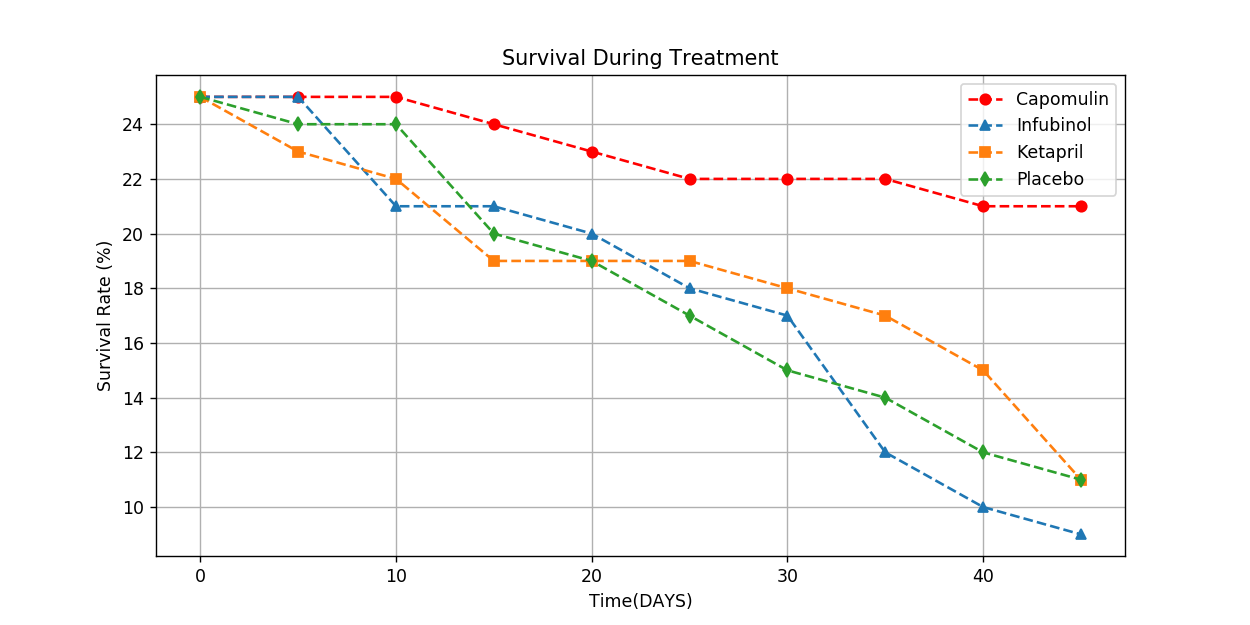

In [46]:
# Generate the Plot (Accounting for percentages)

fig,ax=plt.subplots(figsize = (10, 5))



ax.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o',color='r')
ax.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='^')
ax.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='s')
ax.errorbar(x=mice_table_fourdrugs['Timepoint'],y=mice_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='d')




ax.set_ylabel("Survival Rate (%)")
ax.set_xlabel("Time(DAYS)")
ax.set_title('Survival During Treatment')
ax.grid()
plt.legend()       
plt.show()

# Save the Figure
fig.savefig("IMAGES_OF_PLOTS/SurvivalDuringTreatment.png")
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "SurvivalDuringTreatment.png")
fig.savefig(path)
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug

pymaceuticals_pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [25]:
## Calculate the percent changes for Capomulin drug
Capomulin_percent=(pymaceuticals_pivot_table["Capomulin"].iloc[9]-pymaceuticals_pivot_table["Capomulin"].iloc[0])/pymaceuticals_pivot_table["Capomulin"].iloc[0]*100

# Display the data to confirm
Capomulin_percent

-19.475302667894155

In [26]:
## Calculate the percent changes for Ceftamin drug
Ceftamin_percent=(pymaceuticals_pivot_table["Ceftamin"].iloc[9]-pymaceuticals_pivot_table["Ceftamin"].iloc[0])/pymaceuticals_pivot_table["Ceftamin"].iloc[0]*100

# Display the data to confirm
Ceftamin_percent

42.516491855897414

In [27]:
## Calculate the percent changes for Ceftamin drug
Infubinol_percent=(pymaceuticals_pivot_table["Infubinol"].iloc[9]-pymaceuticals_pivot_table["Infubinol"].iloc[0])/pymaceuticals_pivot_table["Infubinol"].iloc[0]*100

# Display the data to confirm
Infubinol_percent

46.12347172785184

In [28]:
## Calculate the percent changes for Ceftamin drug

Ketapril_percent=(pymaceuticals_pivot_table["Ketapril"].iloc[9]-pymaceuticals_pivot_table["Ketapril"].iloc[0])/pymaceuticals_pivot_table["Ketapril"].iloc[0]*100

# Display the data to confirm
Ketapril_percent

57.02879468660604

In [29]:
## Calculate the percent changes for Ceftamin drug
Naftisol_percent=(pymaceuticals_pivot_table["Naftisol"].iloc[9]-pymaceuticals_pivot_table["Naftisol"].iloc[0])/pymaceuticals_pivot_table["Naftisol"].iloc[0]*100

# Display the data to confirm
Naftisol_percent

53.923347134769195

In [30]:
## Calculate the percent changes for Ceftamin drug
Placebo_percent=(pymaceuticals_pivot_table["Placebo"].iloc[9]-pymaceuticals_pivot_table["Placebo"].iloc[0])/pymaceuticals_pivot_table["Placebo"].iloc[0]*100

# Display the data to confirm
Placebo_percent

51.29796048315153

In [31]:
## Calculate the percent changes for Propriva drug
Propriva_percent=(pymaceuticals_pivot_table["Propriva"].iloc[9]-pymaceuticals_pivot_table["Propriva"].iloc[0])/pymaceuticals_pivot_table["Propriva"].iloc[0]*100

# Display the data to confirm
Propriva_percent

47.24117486320634

In [32]:
## Calculate the percent changes for Ramicane drug
Ramicane_percent=(pymaceuticals_pivot_table["Ramicane"].iloc[9]-pymaceuticals_pivot_table["Ramicane"].iloc[0])/pymaceuticals_pivot_table["Ramicane"].iloc[0]*100

# Display the data to confirm
Ramicane_percent

-22.32090046276666

In [33]:
## Calculate the percent changes for Stelasyn drug
Stelasyn_percent=(pymaceuticals_pivot_table["Stelasyn"].iloc[9]-pymaceuticals_pivot_table["Stelasyn"].iloc[0])/pymaceuticals_pivot_table["Stelasyn"].iloc[0]*100

# Display the data to confirm
Stelasyn_percent

52.085134287898995

In [34]:
## Calculate the percent changes for Zoniferol drug
Zoniferol_percent=(pymaceuticals_pivot_table["Zoniferol"].iloc[9]-pymaceuticals_pivot_table["Zoniferol"].iloc[0])/pymaceuticals_pivot_table["Zoniferol"].iloc[0]*100

# Display the data to confirm
Zoniferol_percent

46.57975086509522

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [35]:
# Store all Relevant Percent Changes into a Tuple

drug_percent_tuple = {'Capomulin': Capomulin_percent, 'Infubinol': Infubinol_percent, 'Ketapril': Ketapril_percent, 'Placebo': Placebo_percent}
percentchange_tumorvolume = pd.Series(drug_percent_tuple)
percentchange_tumorvolume

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [36]:
#Index the 4 drugs
drugs=percentchange_tumorvolume.keys()
drugs

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

<IPython.core.display.Javascript object>


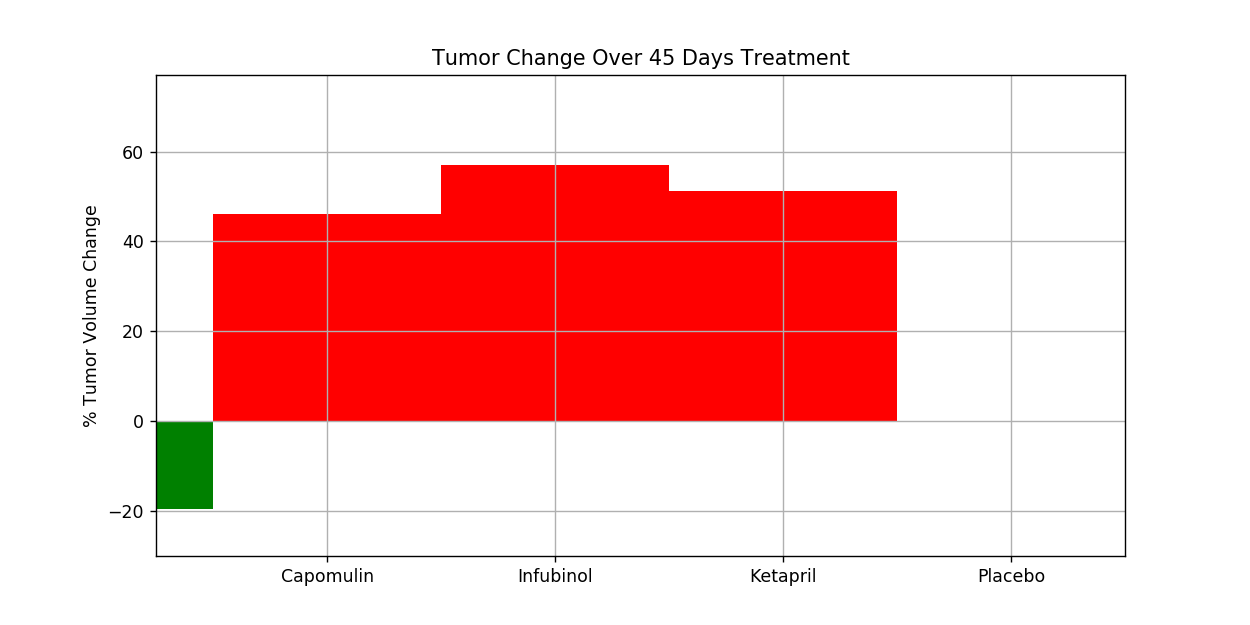

In [47]:

# Splice the data between passing and failing drugs
fig,ax=plt.subplots(figsize = (10, 5))
x_axis = np.arange(0, len(drugs))
# Orient widths. Add labels, tick marks, etc. 

#Plot       
ax.bar(x_axis, percentchange_tumorvolume,width=-1,color=colors, align="edge")
ax.set_title("Tumor Change Over 45 Days Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlim(-0.25, len(drugs))
ax.set_ylim(-30, max(percentchange_tumorvolume) + 20)
ax.grid()



tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, drugs)
colors = []
for value in percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
# Use functions to label the percentages of changes


# Call functions to implement the function calls



# Save the Figure
fig.savefig("IMAGES_OF_PLOTS/TumorChangeOver45DaysTreatment.png")

import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "TumorChangeOver45DaysTreatment.png")
fig.savefig(path)

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
## 3 OBSERVATION ABOUT RESULT 


# from mice data we can reveal that Capomulin might be a good candidate as an anti-cancer drug. 
# from SurvivalDuringTreatment.png we see that Survival rates of mice under Capomulin is also higher compared to the other drugs.
#According to the Bar chart TumorChangeOver45DaysTreatment.png, Capomulin is reducing reducing tumor volume by -19.475303.


